In [1]:
import numpy as np
from pyproj import Proj
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
p = Proj('+proj=lcc +lon_0=119 +lat_1=30 +lat_2=60 +ellps=krass')

In [3]:
lon_c = 119
lat_c = 33
res = 0.5
width = 1200
height=1200

In [4]:
x, y = p(lon_c , lat_c)            # 网格中心
print '%.3f, %.3f' %(x, y)

0.000, 4023443.810


In [5]:
X = np.array(range(-width/2, width/2, 1)) * res*1000 + x               
Y = np.array(range(height/2, -height/2, -1)) * res*1000 + y  
X, Y = np.meshgrid(X, Y)

In [6]:
Lon, Lat = p(X, Y, inverse=True)

In [7]:
print Lon.min(), Lon.max()
print Lat.min(), Lat.max()

115.6164295801374 122.37793783197269
30.228095585526418 35.74892471940169


In [8]:
Data = np.ones_like(Lon)*3

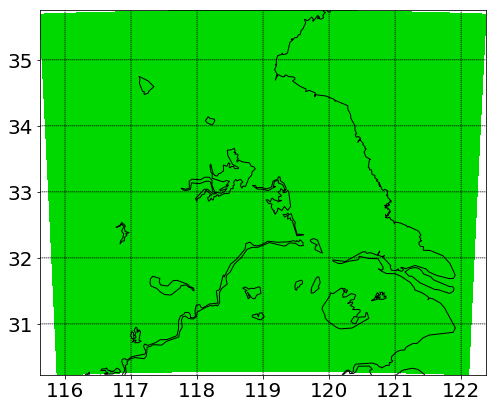

In [10]:
cmpfile='./CI.rgb'
cmpdata=np.loadtxt(cmpfile)
cmpdata=cmpdata/255.0;
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='cyl',resolution='i',llcrnrlon=Lon.min(),llcrnrlat=Lat.min(),urcrnrlon=Lon.max(),urcrnrlat=Lat.max(),suppress_ticks=False)
m.drawcoastlines(linewidth=1,color='k')
m.drawcountries(linewidth=1,color='k')
m.drawmeridians(np.arange(115,123,1))
m.drawparallels(np.arange(30,37,1))
levels = [0,1,2,3,4,5]
cf = m.contourf(Lon,Lat,Data,levels=levels,colors=cmpdata)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()